In [1]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
x = pd.DataFrame(iris['data'],columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])

In [9]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
x.shape, y.shape

((150, 4), (150, 1))

In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [12]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [13]:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
scaler = StandardScaler()
x = scaler.fit_transform(x.values)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y.values, test_size=0.2, random_state=62)

In [36]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((120, 4), (30, 4), (120, 1), (30, 1))

In [37]:
model = GaussianNB()

In [38]:
model.fit(x_train, y_train)

GaussianNB()

In [39]:
y_pred = model.predict(x_test)

In [40]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


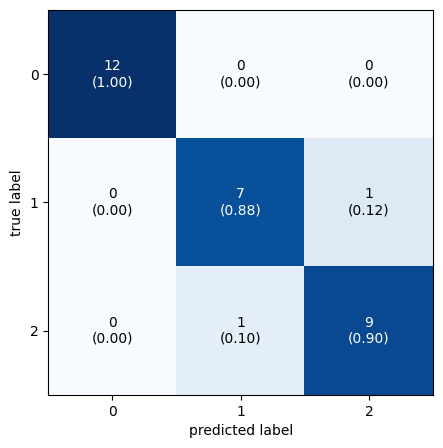

In [41]:
plot_confusion_matrix(conf_mat=cm, figsize=(5,5), show_normed=True)
plt.show()

In [42]:
# print(f"TP value is {cm[0,0]}")
# print(f"TN value is {cm[1,1] + cm[2,2]}")
# print(f"FP value is {cm[0,1] + cm[0,2]}")
# print(f"FN value is {cm[1,0] + cm[2,0]}")
print(f"TP value is {cm[0,0]}")
print(f"TN value is {cm[1,1]+cm[2,2]}")
print(f"FP value is {cm[0,1]+cm[0,2]}")
print(f"FN value is {cm[1,0]+cm[2,0]}")

TP value is 12
TN value is 16
FP value is 0
FN value is 0


In [43]:
# print(f"Accuracy score is {accuracy_score(y_test, y_pred)}")
# Accuracy score is 1.0
# print(f"Error rate is {1 - accuracy_score(y_test, y_pred)}")
# Error rate is 0.0
# print(f"Precision score is {precision_score(y_test, y_pred, average='macro')}")
# Precision score is 1.0
# print(f"Recall score is {recall_score(y_test, y_pred, average='macro')}")
# Recall score is 1.0
# print(classification_report(y_test, y_pred))
print(f"Accuracy score is {accuracy_score(y_test, y_pred)}")

Accuracy score is 0.9333333333333333


In [44]:
print(f"Error rate is {1 - accuracy_score(y_test, y_pred)}")

Error rate is 0.06666666666666665


In [45]:
print(f"Recall score is {precision_score(y_test, y_pred, average='macro')}")

Recall score is 0.9249999999999999


In [46]:
print(f"Recall score is {recall_score(y_test, y_pred, average='macro')}")

Recall score is 0.9249999999999999


In [47]:
print(f"Accuracy score is {accuracy_score(y_test, y_pred)}")

Accuracy score is 0.9333333333333333
